# Python_DLL

## Perceptron

Perceptronは1957年に提唱されたアルゴリズムでDLLの起源ともいえるアルゴリズム

b
は 
**bias**
と呼ばれ、各node(neuron)の発火しやすさを調整するパラメータ

w 
は
**weight(重み)**
と呼ばれ、各nodeからの入力の重要度を示すパラメータ

In [1]:
import math


In [2]:
import numpy as np


In [10]:
def AND( x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5,0.5])
    b = -0.7
    
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return(0)
    else:
        return(1)

In [11]:
def NAND( x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    
    tmp = np.sum(w*x) + b
    if tmp<= 0:
        return(0)
    else:
        return(1)

In [13]:
def OR( x1, x2):
    x = np.array([x1,x2])
    w = np.array([0.5,0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp<=0:
        return(0)
    else:
        return(1)

In [14]:
def XOR( x1, x2):
    if AND(NAND(x1,x2),OR(x1,x2)):
        return(1)
    else:
        return(0)

# 活性化関数
入力信号の総和を出力信号に変換する関数を一般に**活性化関数**と呼ばれる。

例えばPerceptronだと、

$$ y = h( b + w_1 x_1 + w_2 x_2) $$

と表されるこのh()関数が活性化関数になる。

活性化関数は閾値を境にして出力が切り替わる関数で、一般に
**ステップ関数**や**階段関数**と呼ばれる。

ここで、活性化関数を実際に実装していくが、
先ほどのPerceptron とこれからやっていくニューラルネットワークの主な違いは、**この活性化関数だけである!!**


## ステップ関数
以下にステップ関数を実際に実装してみる

In [44]:
def StepFunction(x):
    y = x > 0
    return(y.astype(np.int))

In [45]:
StepFunction(np.array([3.0, -0.5]))

array([1, 0])

In [46]:
import matplotlib.pyplot as plt

In [47]:
x0 = np.arange(-5.0, 5.0, 0.1)
y0 = StepFunction(x)

(-0.1, 1.1)

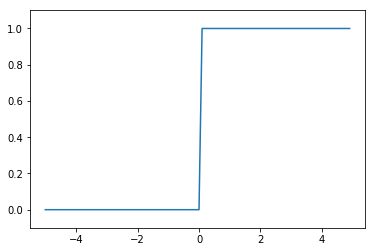

In [41]:
plt.plot(x0,y0)
plt.ylim(-0.1,1.1)


## シグモイド関数
ニューラルネットワークでよく使われる活性化関数の一つが**シグモイド関数(sigmoid function)**。

$$ h(x) = \frac{1}{1+\exp(-x)} $$



In [48]:
def Sigmoid(x):
    h = 1 / (1 + np.exp(-x))
    return(h)

In [49]:
x = np.arange(-5.0, 5.0, 0.1)

In [50]:
y = Sigmoid(x)

(-0.1, 1.1)

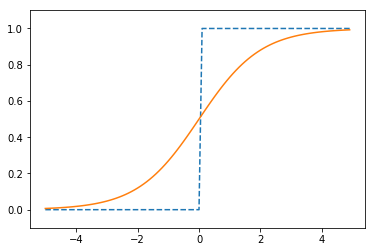

In [51]:
plt.plot(x0,y0,linestyle="dashed")
plt.plot(x,y)
plt.ylim(-0.1,1.1)

## ステップ関数とシグモイド関数の比較
上のグラフで示す通り、ステップ関数とシグモイド関数の違いはその**滑らかさ**である。

ただ、どちらも入力が大きくなれば1に近づき、逆に入力が小さくなれば0に近づくという構造になっている。

またどちらも**非線形関数**である。

ニューラルネットワークでは、活性化関数は非線形の関数である必要がある。
(線形の関数だと隠れ層を用意する必要がなくなるため)

## ReLU関数
シグモイド関数は昔からニューラルネットに使われている活性化関数だが、最近ではReLU関数がよく使われている。


In [52]:
def Relu( x ):
    return(np.maximum(0,x))

In [54]:
x2 = x
y2 = Relu(x2)

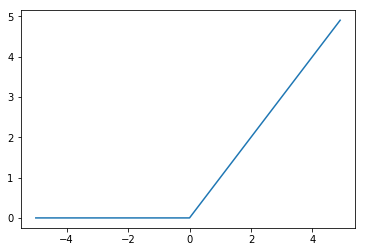

In [55]:
plt.plot(x2, y2)

## 3層ニューラルネットの実装

ここでは隠れ層を２つ持ち、第0層(入力層)に2つ、第一層に３つ、第二層に2つのニューロンを持つニューラルネットを作る。(出力層は2つ)

### 第一層

In [57]:
x = np.array([1.0,0.5])
w1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
b1 = np.array([0.1,0.2,0.3])

a1 = np.dot(x, w1) + b1

In [58]:
z1 = Sigmoid(a1)

In [59]:
z1

array([0.57444252, 0.66818777, 0.75026011])

### 第二層

In [61]:
w2 = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
b2 = np.array([0.1,0.2])

a2 = np.dot(z1, w2) + b2

In [62]:
z2 = Sigmoid(a2)

In [63]:
z2

array([0.62624937, 0.7710107 ])

### 第三層(出力層)

ここでは活性化関数のみ他の層とは違う。


In [64]:
def IdentifyFunction( x ):
    return(x)

このIdentifyFunctionは**恒等関数**と呼ばれる。
この関数は、ただ入力をそのまま出力する関数。

そのため、なくても構わないが、他の層と形を整えるためにこの関数を作った。

In [66]:
w3 = np.array([[0.1,0.3], [0.2,0.4]])
b3 = np.array([0.1,0.2])

In [67]:
a3 = np.dot(z2,w3) + b3

In [68]:
y = IdentifyFunction(a3)

In [69]:
y

array([0.31682708, 0.69627909])

### まとめ

試しに実装してみる


In [92]:
class Layer():
    def __init__(self):
        self.__weight = np.zeros(1)
        self.__bias   = np.zeros(1)
        #self.input  = np.zeros(1)
        #self.output = np.zeros(1)

    def SetWeight(self, weight):
        self.__weight = weight
    
    def SetBias(self, bias):
        self.__bias = bias
    
    def Sigmoid(self, x):
        h = 1 / (1 + np.exp(-x))
        return(h)
    
    def CalcInput(self, x):
        a = np.dot(x,self.__weight) + self.__bias
        return(a)
    
    def Forward(self, x):
        z = self.Sigmoid(x)
        return(z)
    
    def Show(self):
        print("weight:",self.__weight)
        print("bias:", self.__bias)
    

In [93]:
def InitNetwork():
    network = [Layer() for i in range(3)]
    
    network[0].SetWeight(np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]]))
    network[0].SetBias(np.array([0.1,0.2,0.3]))
    network[0].Show()
    
    network[1].SetWeight(np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]]))
    network[1].SetBias(np.array([0.1,0.2]))
    network[1].Show()
    
    network[2].SetWeight(np.array([[0.1,0.3],[0.2,0.4]]))
    network[2].SetBias(np.array([0.1,0.2]))
    network[2].Show()
    
    return(network)


In [109]:
def Forward(network, x):
    tmp = x
    for i in range(len(network)-1):
        tmp = network[i].CalcInput(tmp)
        tmp = network[i].Forward(tmp)
    tmp = network[len(network)-1].CalcInput(tmp)
    y = IdentifyFunction(tmp)
    return(y)

In [110]:
network = InitNetwork()

weight: [[0.1 0.3 0.5]
 [0.2 0.4 0.6]]
bias: [0.1 0.2 0.3]
weight: [[0.1 0.4]
 [0.2 0.5]
 [0.3 0.6]]
bias: [0.1 0.2]
weight: [[0.1 0.3]
 [0.2 0.4]]
bias: [0.1 0.2]


In [111]:
x = np.array([1.0,0.5])

In [112]:
y = Forward(network, x)

In [113]:
y

array([0.31682708, 0.69627909])